# Part 3 of "Exploring GAN latent space to generate images with desired features​ by Digital Sreeni": Arithmetic with GAN latent vectors (Predict)

1) Link to the Youtube tutorial video: https://www.youtube.com/watch?v=iuQ_f3W5Ttk&list=PLZsOBAyNTZwboR4_xj-n3K6XBTweC4YVD&index=13
2) Link to the UTKFace dataset: https://susanqq.github.io/UTKFace/

3) **Insights of this tutorial:**
    1) Latent space is hard to interpret unless conditioned using many classes.​ But, the latent space can be exploited using generated images. Here is how:
        1) Generate 10s of images using random latent vectors.​
        2) Identify many images within each category of interest (e.g., smiling man, neutral man, etc. )​
        3) Average the latent vectors for each category to get a mean representation in the latent space (for that category).​
        4) Use these mean latent vectors to generate images with features of interest. ​

    2) This part of the code is used to generate 128x128x3 images (of faces) using a trained generator model. 
    3) Faces can be generated using two random latent vectors and interpolated in between.
    4) Finally, the features in the new images can be 'engineered' by doing simple arithmetic between the vectors that are used to generate images. 
    5) In summary, you can find the latent vectors for Smiling Man, neutral face man, and a baby with neutral face. Then, generate a smiling baby face by:
        1) Smiling Man vector + Neutral Man vector - Neutral baby vector = Smiling Baby vector 

4) **Visual explanation of latent space and how we engineer the features in the new images by doing simple arithmetic between the vectors(points) of the latent space:**
    1) <img src="hidden\photo10.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
    2) <img src="hidden\photo11.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
    3) <img src="hidden\photo12.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
    4) <img src="hidden\photo13.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />
    5) <img src="hidden\photo14.png" alt="This image is a representation of the simple neural network" style="width: 600px;"/>  <br />

# Supplementary part:

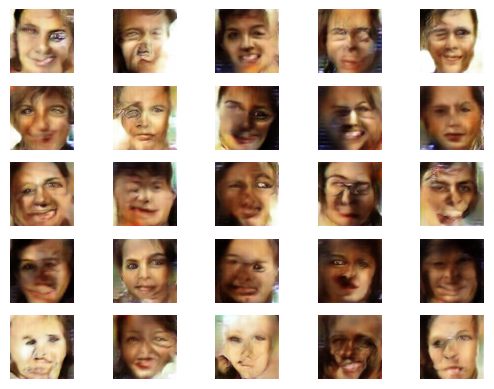

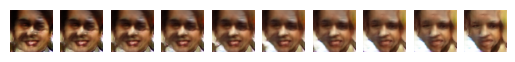

In [36]:
from numpy import asarray
from numpy.random import randn
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt


#####################################################################
#Let us start by generating images using random latent vectors.
#########################################################################
# Function to generate random latent points
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim) #Reshape to be provided as input to the generator.
	return z_input

# Function to create a plot of generated images
def plot_generated(examples, n):
	# plot images
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :])
	plt.show()

# load the saved model
model = load_model('D:/AI_Master_New/Under_Local_Git_Covered/Deep_Learning_Tutorials_codebasics/Generative_Adversarial_Network_GAN/Explore_GAN_LatentSpace_Tutorial13/saved_data_during_training/models/generator_model_128x128_020.h5')
# generate latent vectors to be used as input to the generator
#Here, we are generating 25 latent vectors
latent_points = generate_latent_points(100, 25)
# generate images using the loaded generator model
X  = model.predict(latent_points)
# scale from [-1,1] to [0,1] for plotting
X = (X + 1) / 2.0
# plot the generated images. Let us do 5x5 plot as we generated 25 images
plot_generated(X, 5)

#####################################################################
#Now, let us generate 2 latent vectors and interpolate between them.
#Let us do linear interpolation although in reality the latent space is curved. 
#Interpolating between faces - Linear interpolation
#################################################################

from numpy import linspace

# Function to generate random latent points
#Same as defined above, re-defining for convenience. 
def generate_latent_points(latent_dim, n_samples, n_classes=10):
 	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim) #Reshape to be provided as input to the generator.
	return z_input

# Interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
	# interpolate between points (e.g., between 0 and 1 if you divde to 10 then you have 0.111, 0.222, etc.)
	ratios = linspace(0, 1, num=n_steps)
	# linear interpolation of vectors based on the above interpolation ratios
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return asarray(vectors)

# create a plot of generated images
def plot_generated(examples, n):
 	# plot images
	for i in range(n):
		plt.subplot(1, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :])
	plt.show()

# load the model, if you haven't already loaded it above. 
model = load_model('D:/AI_Master_New/Under_Local_Git_Covered/Deep_Learning_Tutorials_codebasics/Generative_Adversarial_Network_GAN/Explore_GAN_LatentSpace_Tutorial13/saved_data_during_training/models/generator_model_128x128_020.h5')
# generate points in latent space
#Let us generate 2 latent points between which we will interpolate
pts = generate_latent_points(100, 2)
# interpolate points in latent space
interpolated = interpolate_points(pts[0], pts[1])
# generate images using the interpolated latent points
X = model.predict(interpolated)
# scale from [-1,1] to [0,1] for plotting
X = (X + 1) / 2.0
# plot the result
plot_generated(X, len(interpolated))

################################################################
#Now, let us perform arithmetic with latent points so we can generate faces
#with features of interest. 
#To work with latent points we must first generate a bunch of faces and 
#save them along with their corresponding latent points. This can be used
#to visually locate images of interest and thus identify the latent points.
#For example, latent points corresponding to baby face or sun glasses, etc. 
###########################################################

from numpy import mean, expand_dims
# example of loading the generator model and generating images

# Function to generate random latent points
#Same as defined above, re-defining for convenience. 
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim) #Reshape to be provided as input to the generator.
	return z_input

# create a plot of generated images and save for easy visualization
def plot_generated(examples, n):
    plt.figure(figsize=(16, 16))
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :])
    plt.savefig('generated_faces.png')
    plt.close()

# Important part:

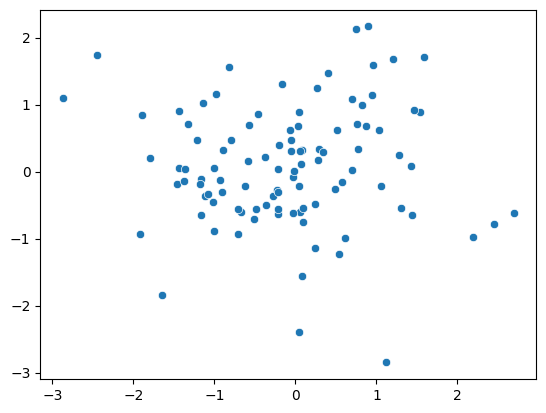

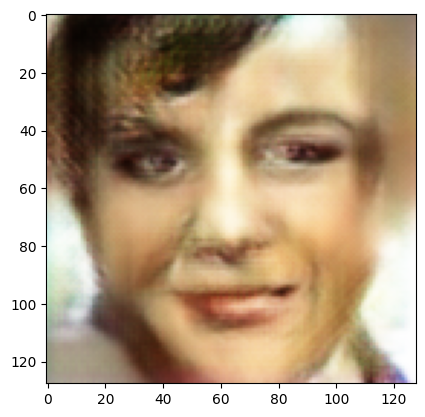

In [37]:
# load the model, if you haven't already loaded it above
model = load_model('D:/AI_Master_New/Under_Local_Git_Covered/Deep_Learning_Tutorials_codebasics/Generative_Adversarial_Network_GAN/Explore_GAN_LatentSpace_Tutorial13/saved_data_during_training/models/generator_model_128x128_020.h5')

# generate points in latent space that we can use to generate some images
#We then identify some images with our features of interest and locate thir corresponding latent vectors
latent_points = generate_latent_points(100, 100)

#Plot the latent points to see that they are spread around and we have no clue how to interpret them. 
import seaborn as sns
plt.figure(1)
#sns.scatterplot(data=latent_points,x=[0], y=[1]) # Based on all vectors/points in latent_points, plot the 1st (x=[0]) and 2nd (y=[1]) row/vector in latent_points

sns.scatterplot(x=latent_points[0], y=latent_points[1]) # Based on all vectors/points in latent_points, plot the 1st (x=[0]) and 2nd (y=[1]) row/vector in latent_points

""" Version 1: Explanation on how to analyse the outputs obtained after creating a scatter plot for two vectors using Seaborn (given by Co-pilot)
A scatter plot of **vector2** against **vector1** displays the relationship between the two vectors. 
Each point on the plot corresponds to a pair of values from the vectors, with the x-coordinate representing the value from **vector1** and the y-coordinate representing the value from **vector2**. 
The size and color of the markers can be customized based on additional vectors or scalar values¹². 
You can create such a plot using libraries like Matplotlib in Python. 
If you need further assistance or have specific requirements, feel free to ask!

Source: Conversation with Copilot, 29/08/2024
(1) Add markers on line plot from another vector - Stack Overflow. https://stackoverflow.com/questions/29883561/add-markers-on-line-plot-from-another-vector.
(2) matplotlib.pyplot.scatter — Matplotlib 3.9.2 documentation. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html.
(3) Scatter plot — Matplotlib 3.9.2 documentation. https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html.
"""

"""Version 2: Explanation on how to analyse the outputs obtained after creating a scatter plot for two vectors using Seaborn (given by Co-pilot)
Certainly! To create a scatter plot for two vectors using Seaborn, you can use the `sns.scatterplot()` function. Here's an example in Python:

```python
import seaborn as sns
import pandas as pd

# Example data (you can replace this with your own vectors)
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 8, 6, 4, 2]
})

# Create the scatter plot
sns.scatterplot(data=data, x='x', y='y')
```

This will generate a scatter plot with the `x` values on the x-axis and the `y` values on the y-axis. 
Feel free to replace the example data with your own vectors!

For more information, you can refer to the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).¹²³

Source: Conversation with Copilot, 29/08/2024
(1) seaborn.scatterplot — seaborn 0.13.2 documentation. https://seaborn.pydata.org/generated/seaborn.scatterplot.html.
(2) seaborn.scatterplot — seaborn 0.11.2 documentation. https://seaborn.pydata.org/archive/0.11/generated/seaborn.scatterplot.html.
(3) How to Make a Scatter Plot in Python using Seaborn - Erik Marsja. https://www.marsja.se/how-to-make-a-scatter-plot-in-python-using-seaborn/.
(4) Visualizing statistical relationships — seaborn 0.13.2 documentation. https://seaborn.pydata.org/tutorial/relational.html.
"""


# generate images using the latent points. 
X  = model.predict(latent_points)
# scale from [-1,1] to [0,1] for plotting
X = (X + 1) / 2.0
# plot and save generated images
plot_generated(X, 10)

#Now, identify images corresponding to a specific type.
#e.g. all baby face images, smiling man images, 
# smiling man - neutral man + baby face = smiling baby

# retrieve specific points
#Now, identify images corresponding to a specific type.
#Start counting from 1 as we are going to offset our image number later, by subtracting 1.
#e.g. all baby face images, smiling man images, 
# smiling man - neutral man + baby face = smiling baby
#OR try adult with glasses  - adult no glasses + baby no glasses

#Identify a few images from classes of interest
# smiling_man_ix = [1, 10, 16, 26, 27, 28]
# neutral_man_ix = [16, 95, 63]
# baby_ix = [13,26,28,93,94]
adult_with_glasses = [3,39,40]
adult_no_glasses = [4, 7, 8]
#baby_no_glasses = [15,20]
person_with_lipstick = [9, 10, 11, 31]
#person_no_lipstick = [1, 4, 9, 15]

#Reassign classes of interest to new variables... just to make it easy not
# to change names all the time we get interested in new features. 
feature1_ix = adult_with_glasses
feature2_ix = adult_no_glasses
feature3_ix = person_with_lipstick

# Function to average list of latent space vectors to get the mean for a given type
def average_points(points, ix):
	# subtract 1 from image index so it matches the image from the array
    # we are doing this as our array starts at 0 but we started counting at 1. 
	zero_ix = [i-1 for i in ix]
	# retrieve required vectors corresponding to the selected images
	vectors = points[zero_ix]
	# average the vectors
	avg_vector = mean(vectors, axis=0)
	
	return avg_vector

# average vectors for each class
feature1 = average_points(latent_points, feature1_ix)
feature2 = average_points(latent_points, feature2_ix)
feature3 = average_points(latent_points, feature3_ix)

# Vector arithmetic....
result_vector = feature1 - feature2 + feature3

# generate image using the new calculated vector
result_vector = expand_dims(result_vector, 0)
result_image = model.predict(result_vector)

# scale pixel values for plotting
result_image = (result_image + 1) / 2.0
plt.figure(2)
plt.imshow(result_image[0])
plt.show()